<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Pediatric_BTM__with_conversation_ID_14th_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweet-preprocessor

In [2]:
!pip install bertopic

  Using cached bertopic-0.16.0-py2.py3-none-any.whl (154 kB)
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached umap-learn-0.5.5.tar.gz (90 kB)
  Preparing metadata (setup.py) ... done
  Using cached sentence_transformers-2.5.1-py3-none-any.whl (156 kB)
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Using cached pynndescent-0.5.11-py3-none-any.whl (55 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 741.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
data= pd.read_csv("/content/grouped_tweets_with_conversation_id_cleaned_tweet_14th_March.csv")
data

,conversation_id,author_id,tweet_id,text,created_at,lang,referenced_tweets_type,referenced_tweets_id,public_metrics,clean_text
0,4.554059e+17,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,2024-02-01T11:39:39+00:00,en,replied_to,455405931363201024,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",hey i wanted to ask did you have to get tetanu...
1,8.515137e+17,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,2023-11-10T00:20:05+00:00,en,replied_to,1722770222602731658,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",no they didn't. the chronology of vaccination ...
2,NaN,758753774324191233,1722817524776284216,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,2023-11-10T03:24:40+00:00,en,replied_to,1722812093014175874,"{'retweet_count': 1, 'reply_count': 1, 'like_c...",really? why do thousands of ex-pro-vax parents...
3,NaN,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,2023-12-29T07:51:17+00:00,en,replied_to,1740532061876732311,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",parents should sue vicky for disseminating a l...
4,NaN,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,2023-12-29T14:03:17+00:00,en,replied_to,1740669196240097617,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",i can’t find the tweet where you said dissemin...
...,...,...,...,...,...,...,...,...,...,...
28006,1.767014e+18,1235664321344090119,1767016898892345572,@Scottcrates Lol!!! I have a nice collection o...,2024-03-11T02:37:12+00:00,en,replied_to,1767016546390729027,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",lol!!! i have a nice collection of scars. ever...
28007,1.767018e+18,1739165191630147584,1767018991350927862,in those mislabeled concentration camps—from s...,2024-03-11T02:45:31+00:00,en,replied_to,1767018420833288483,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",in those mislabeled concentration camps—from s...
28008,1.767021e+18,993727790552834048,1767022463014084841,"Growing up (as a child of the 90s), we weren't...",2024-03-11T02:59:19+00:00,en,replied_to,1767020706816991499,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","growing up (as a child of the 90s), we weren't..."
28009,1.767027e+18,1679227428642893824,1767027837393875200,@HopiNg66966500 @CommunityNotes It is always e...,2024-03-11T03:20:40+00:00,en,replied_to,1767027126052773889,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",it is always entertaining to see the slow kids...


In [6]:
data.columns

Index(['conversation_id', 'author_id', 'tweet_id', 'text', 'created_at',
       'lang', 'referenced_tweets_type', 'referenced_tweets_id',
       'public_metrics', 'clean_text'],
      dtype='object')

In [7]:
data_tweet = data[['author_id', 'tweet_id', 'text', 'clean_text', 'created_at']]
data_tweet

,author_id,tweet_id,text,clean_text,created_at
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey i wanted to ask did you have to get tetanu...,2024-02-01T11:39:39+00:00
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,no they didn't. the chronology of vaccination ...,2023-11-10T00:20:05+00:00
2,758753774324191233,1722817524776284216,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really? why do thousands of ex-pro-vax parents...,2023-11-10T03:24:40+00:00
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents should sue vicky for disseminating a l...,2023-12-29T07:51:17+00:00
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,i can’t find the tweet where you said dissemin...,2023-12-29T14:03:17+00:00
...,...,...,...,...,...
28006,1235664321344090119,1767016898892345572,@Scottcrates Lol!!! I have a nice collection o...,lol!!! i have a nice collection of scars. ever...,2024-03-11T02:37:12+00:00
28007,1739165191630147584,1767018991350927862,in those mislabeled concentration camps—from s...,in those mislabeled concentration camps—from s...,2024-03-11T02:45:31+00:00
28008,993727790552834048,1767022463014084841,"Growing up (as a child of the 90s), we weren't...","growing up (as a child of the 90s), we weren't...",2024-03-11T02:59:19+00:00
28009,1679227428642893824,1767027837393875200,@HopiNg66966500 @CommunityNotes It is always e...,it is always entertaining to see the slow kids...,2024-03-11T03:20:40+00:00


In [8]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet['date'] = data_tweet['created_at'].dt.date
data_tweet['time'] = data_tweet['created_at'].dt.time
data_tweet['day_of_week'] = data_tweet['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey i wanted to ask did you have to get tetanu...,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,no they didn't. the chronology of vaccination ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday
2,758753774324191233,1722817524776284216,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really? why do thousands of ex-pro-vax parents...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents should sue vicky for disseminating a l...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,i can’t find the tweet where you said dissemin...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday
...,...,...,...,...,...,...,...,...
28006,1235664321344090119,1767016898892345572,@Scottcrates Lol!!! I have a nice collection o...,lol!!! i have a nice collection of scars. ever...,2024-03-11 02:37:12+00:00,2024-03-11,02:37:12,Monday
28007,1739165191630147584,1767018991350927862,in those mislabeled concentration camps—from s...,in those mislabeled concentration camps—from s...,2024-03-11 02:45:31+00:00,2024-03-11,02:45:31,Monday
28008,993727790552834048,1767022463014084841,"Growing up (as a child of the 90s), we weren't...","growing up (as a child of the 90s), we weren't...",2024-03-11 02:59:19+00:00,2024-03-11,02:59:19,Monday
28009,1679227428642893824,1767027837393875200,@HopiNg66966500 @CommunityNotes It is always e...,it is always entertaining to see the slow kids...,2024-03-11 03:20:40+00:00,2024-03-11,03:20:40,Monday


In [9]:
timestamp=data_tweet.created_at.tolist()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)


In [12]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday
2,758753774324191233,1722817524776284216,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really ? thousands ex-pro-vax parents continue...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday
...,...,...,...,...,...,...,...,...
28006,1235664321344090119,1767016898892345572,@Scottcrates Lol!!! I have a nice collection o...,lol ! ! ! nice collection scars . every one le...,2024-03-11 02:37:12+00:00,2024-03-11,02:37:12,Monday
28007,1739165191630147584,1767018991350927862,in those mislabeled concentration camps—from s...,mislabeled concentration camps—from starvation...,2024-03-11 02:45:31+00:00,2024-03-11,02:45:31,Monday
28008,993727790552834048,1767022463014084841,"Growing up (as a child of the 90s), we weren't...","growing ( child 90s ) , n't allowed school wit...",2024-03-11 02:59:19+00:00,2024-03-11,02:59:19,Monday
28009,1679227428642893824,1767027837393875200,@HopiNg66966500 @CommunityNotes It is always e...,always entertaining see slow kids like grok ca...,2024-03-11 03:20:40+00:00,2024-03-11,03:20:40,Monday


In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [14]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)

In [15]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday,hey wanted ask get tetanus vaccine ?
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday,n't . chronology vaccination first appearance ...
2,758753774324191233,1722817524776284216,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really ? thousands ex-pro-vax parents continue...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday,really ? thousand ex-pro-vax parent continue t...
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday,parent sue vicky disseminating ludacris ration...
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday,’ find tweet said disseminated “ ludacris rati...
...,...,...,...,...,...,...,...,...,...
28006,1235664321344090119,1767016898892345572,@Scottcrates Lol!!! I have a nice collection o...,lol ! ! ! nice collection scars . every one le...,2024-03-11 02:37:12+00:00,2024-03-11,02:37:12,Monday,lol ! ! ! nice collection scar . every one les...
28007,1739165191630147584,1767018991350927862,in those mislabeled concentration camps—from s...,mislabeled concentration camps—from starvation...,2024-03-11 02:45:31+00:00,2024-03-11,02:45:31,Monday,mislabeled concentration camps—from starvation...
28008,993727790552834048,1767022463014084841,"Growing up (as a child of the 90s), we weren't...","growing ( child 90s ) , n't allowed school wit...",2024-03-11 02:59:19+00:00,2024-03-11,02:59:19,Monday,"growing ( child 90 ) , n't allowed school with..."
28009,1679227428642893824,1767027837393875200,@HopiNg66966500 @CommunityNotes It is always e...,always entertaining see slow kids like grok ca...,2024-03-11 03:20:40+00:00,2024-03-11,03:20:40,Monday,always entertaining see slow kid like grok cat...


In [16]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 3.4 MB/s eta 0:00:00


In [17]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [19]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [20]:
vectorizer_model = CountVectorizer(stop_words="english")

In [21]:
ctfidf_model = ClassTfidfTransformer()


In [22]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics= 'auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [23]:
import time

In [24]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [25]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-03-14 08:42:52,652 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/876 [00:00<?, ?it/s]

2024-03-14 08:53:03,468 - BERTopic - Embedding - Completed ✓
2024-03-14 08:53:03,471 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-14 08:54:14,678 - BERTopic - Dimensionality - Completed ✓
2024-03-14 08:54:14,681 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-14 08:56:16,384 - BERTopic - Cluster - Completed ✓
2024-03-14 08:56:16,388 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-14 08:57:06,747 - BERTopic - Representation - Completed ✓
2024-03-14 08:57:06,752 - BERTopic - Topic reduction - Reducing number of topics
2024-03-14 08:57:20,872 - BERTopic - Topic reduction - Reduced number of topics from 237 to 64


In [26]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,12217,-1_vaccination_vaccine_vaccinate_kid,"[vaccination, vaccine, vaccinate, kid, measles...",[n't understand considered priority . whether ...
1,0,13202,0_vaccination_vaccine_covid_measles,"[vaccination, vaccine, covid, measles, infant,...","[american academy pediatrics ( 67,000 physicia..."
2,1,203,1_rabies_tetanus_bitten_rabid,"[rabies, tetanus, bitten, rabid, wound, vaccin...","[need rabies , tetanus shot, get rabies tetanu..."
3,2,150,2_social_limeng_guo_yan,"[social, limeng, guo, yan, pinned, founded, ms...","[guo wengui also posted truth social , social ..."
4,3,147,3_rust_rusty_tetanus_rusted,"[rust, rusty, tetanus, rusted, knife, shot, sc...","['d probably get tetanus much rust, ’ like ’ u..."
...,...,...,...,...,...
59,58,15,58_hookworm_worm_ringworm_infections,"[hookworm, worm, ringworm, infections, tetanus...","[hookworm ? tetanus ? hepatitis ? thing ?, mig..."
60,59,15,59_bioweapon_ugliest_crusade_tam,"[bioweapon, ugliest, crusade, tam, zombie, leg...","[ugliest bioweapon ever , may - could n't reme..."
61,60,15,60_ispa_meningococcal_hpv_recommends,"[ispa, meningococcal, hpv, recommends, immuniz...",[covid . urgency measles outbreak . must get f...
62,61,15,61_needle_nicki_britney_minaj,"[needle, nicki, britney, minaj, felonie, tetan...",[nicki minaj one shared needle away getting te...


In [27]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6331770690385313


In [30]:

# Find indices of tweets assigned to Topic 1
topic_unclustered_indices = [index for index, topic_label in enumerate(topics) if topic_label == -1]

# Display tweets assigned to Topic 1
tweets_topic_unclustered = data_tweet.iloc[topic_unclustered_indices, :9]
print("Tweets assigned to Topic -1:")
tweets_topic_unclustered

Tweets assigned to Topic -1:


,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
2,758753774324191233,1722817524776284216,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really ? thousands ex-pro-vax parents continue...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday,really ? thousand ex-pro-vax parent continue t...
7,100573645,1745626595782426946,@ToBornin @gavleeham @axiomotime @FrankDElia7 ...,n't see point . long-term side effects vaccine...,2024-01-12 01:59:47+00:00,2024-01-12,01:59:47,Friday,n't see point . long-term side effect vaccine ...
8,623732328,1747075919003730092,@Humans_R_Free @handmadekathy @krebiozen @TMGF...,irrelevant crap always . deflect away . realit...,2024-01-16 01:58:52+00:00,2024-01-16,01:58:52,Tuesday,irrelevant crap always . deflect away . realit...
9,100573645,1748038180446572879,@trillionofcells @mcfunny @ToBornin @GrouchoMa...,"nonsense , good evidence . measles killed hund...",2024-01-18 17:42:33+00:00,2024-01-18,17:42:33,Thursday,"nonsense , good evidence . measles killed hund..."
11,100573645,1748043148322812115,@trillionofcells @mcfunny @ToBornin @GrouchoMa...,"'s mortality , measles incidence . measles inc...",2024-01-18 18:02:18+00:00,2024-01-18,18:02:18,Thursday,"'s mortality , measles incidence . measles inc..."
...,...,...,...,...,...,...,...,...,...
28000,2726065834,1767030547748946163,"@tgshepherdvan All good, tetanus shot and home...","good , tetanus shot home . happened though , b...",2024-03-11 03:31:27+00:00,2024-03-11,03:31:27,Monday,"good , tetanus shot home . happened though , b..."
28005,1544409366744506368,1767015565082632341,@MaggieM00021130 @sasswashere Is it measles or...,measles required vaccination order attend scho...,2024-03-11 02:31:54+00:00,2024-03-11,02:31:54,Monday,measles required vaccination order attend scho...
28007,1739165191630147584,1767018991350927862,in those mislabeled concentration camps—from s...,mislabeled concentration camps—from starvation...,2024-03-11 02:45:31+00:00,2024-03-11,02:45:31,Monday,mislabeled concentration camps—from starvation...
28008,993727790552834048,1767022463014084841,"Growing up (as a child of the 90s), we weren't...","growing ( child 90s ) , n't allowed school wit...",2024-03-11 02:59:19+00:00,2024-03-11,02:59:19,Monday,"growing ( child 90 ) , n't allowed school with..."


In [32]:
merged = pd.merge(data_tweet, tweets_topic_unclustered, how = 'outer', indicator = True)
data_tweet = merged[merged['_merge'] == 'left_only'].drop(columns = '_merge')
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday,hey wanted ask get tetanus vaccine ?
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday,n't . chronology vaccination first appearance ...
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday,parent sue vicky disseminating ludacris ration...
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday,’ find tweet said disseminated “ ludacris rati...
5,4611508512,1740797060616753391,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,nope standard protocol standing order hospital...,2023-12-29 18:08:56+00:00,2023-12-29,18:08:56,Friday,nope standard protocol standing order hospital...
...,...,...,...,...,...,...,...,...,...
28002,799044177459838976,1767026950709596516,@FoxNews I had Measles as a child. It develope...,measles child . developed bronchial pneumonia ...,2024-03-11 03:17:09+00:00,2024-03-11,03:17:09,Monday,measles child . developed bronchial pneumonia ...
28003,4614194687,1767054277812310199,‘The unfortunate part of the low vaccination r...,‘ unfortunate part low vaccination rates detro...,2024-03-11 05:05:44+00:00,2024-03-11,05:05:44,Monday,‘ unfortunate part low vaccination rate detroi...
28004,4614194687,1767065027910029480,“‘We can now prevent the vast majority of futu...,“ ‘ prevent vast majority future covid-19 epis...,2024-03-11 05:48:27+00:00,2024-03-11,05:48:27,Monday,“ ‘ prevent vast majority future covid-19 epis...
28006,1235664321344090119,1767016898892345572,@Scottcrates Lol!!! I have a nice collection o...,lol ! ! ! nice collection scars . every one le...,2024-03-11 02:37:12+00:00,2024-03-11,02:37:12,Monday,lol ! ! ! nice collection scar . every one les...


In [33]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [34]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-03-14 09:14:01,998 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/494 [00:00<?, ?it/s]

2024-03-14 09:19:49,740 - BERTopic - Embedding - Completed ✓
2024-03-14 09:19:49,744 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-14 09:20:14,527 - BERTopic - Dimensionality - Completed ✓
2024-03-14 09:20:14,530 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-14 09:20:52,811 - BERTopic - Cluster - Completed ✓
2024-03-14 09:20:52,813 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-14 09:21:35,732 - BERTopic - Representation - Completed ✓
2024-03-14 09:21:35,735 - BERTopic - Topic reduction - Reducing number of topics
2024-03-14 09:21:49,027 - BERTopic - Topic reduction - Reduced number of topics from 213 to 63


In [35]:
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1602,-1_pregnant_vaccine_vaccination_vaccinate,"[pregnant, vaccine, vaccination, vaccinate, co...",[american college obstetrician & amp ; gynecol...
1,0,11758,0_vaccination_vaccine_measles_covid,"[vaccination, vaccine, measles, covid, infant,...","[american academy pediatrics ( 67,000 physicia..."
2,1,144,1_diphtheria_rickets_elmo_bingo,"[diphtheria, rickets, elmo, bingo, faucial, to...","[diphtheria, diphtheria, diphtheria ! ! ! !]"
3,2,143,2_social_guo_yan_founded,"[social, guo, yan, founded, platform, posted, ...","[guo wengui also posted truth social , social ..."
4,3,136,3_vanden_geert_vaccinologist_virologist,"[vanden, geert, vaccinologist, virologist, vac...","[dr geert vanden bossche , virologist , vaccin..."
...,...,...,...,...,...
58,57,15,57_hookworm_worm_ringworm_infections,"[hookworm, worm, ringworm, infections, tetanus...","[incel twitter tetanus brain worm , 'ranny twi..."
59,58,15,58_needle_nicki_britney_minaj,"[needle, nicki, britney, minaj, felonie, tetan...",[nicki minaj one shared needle away getting te...
60,59,15,59_polio_tetanus_appetite_arse,"[polio, tetanus, appetite, arse, rachel, boost...",['m watching rachel maddow show response fucki...
61,60,15,60_haemophilus_influenzae_meningitis_bacterial,"[haemophilus, influenzae, meningitis, bacteria...",[hib vaccine prevent haemophilus influenzae ty...


In [36]:
topic_info.to_csv('Pediatric_63_BTM_ConvID_topic_info_14march.csv', index = False)

In [41]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6865079924574018


## **FINAL TWEETS BY TOPIC**

In [37]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.7 MB/s eta 0:00:00


In [47]:
data_tweet.head()

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1410995946960265222,1753020282099630465,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday,hey wanted ask get tetanus vaccine ?
1,100573645,1722771071269478829,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday,n't . chronology vaccination first appearance ...
3,4611508512,1740641622541623370,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday,parent sue vicky disseminating ludacris ration...
4,116780216,1740735239675330695,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday,’ find tweet said disseminated “ ludacris rati...
5,4611508512,1740797060616753391,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,nope standard protocol standing order hospital...,2023-12-29 18:08:56+00:00,2023-12-29,18:08:56,Friday,nope standard protocol standing order hospital...


In [49]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15794 entries, 0 to 28010
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   author_id       15794 non-null  int64              
 1   tweet_id        15794 non-null  int64              
 2   text            15794 non-null  object             
 3   clean_text      15794 non-null  object             
 4   created_at      15794 non-null  datetime64[ns, UTC]
 5   date            15794 non-null  object             
 6   time            15794 non-null  object             
 7   day_of_week     15794 non-null  object             
 8   new_lemma_text  15794 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 1.7+ MB


In [50]:
data_tweet['created_at'] = data_tweet['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [51]:

import pandas as pd
import xlsxwriter as xw
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('Pediatric_tweets_by_topics_63_ConvID.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(64):  # Assuming you have 110 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.iloc[topic_indices, :9]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('Pediatric_tweets_by_topics_63_ConvID.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 53,Topic # 54,Topic # 55,Topic # 56,Topic # 57,Topic # 58,Topic # 59,Topic # 60,Topic # 61,Topic # 62
0,vaccination,diphtheria,social,vanden,rust,gaza,allowance,acip,destroy,canadian,...,asc,bioweapon,bnt162b2,formaldehyde,herd,hookworm,needle,polio,haemophilus,ispa
1,vaccine,rickets,guo,geert,rusty,jew,addiction,eu,sexualize,shortness,...,influenza,ugliest,cytokine,milligram,modify,worm,nicki,tetanus,influenzae,urgency
2,measles,elmo,yan,vaccinologist,tetanus,palestinian,lpc,committee,war,chest,...,sars,zombie,receptor,pear,accepts,ringworm,britney,appetite,meningitis,meningococcal
3,covid,bingo,founded,virologist,blade,diabetic,confiscation,fda,abortion,inflammation,...,cov,wef,pathogen,infant,sterilize,infections,minaj,arse,bacterial,grade
4,infant,faucial,platform,vaccinate,rusted,zionist,ndp,obstetrician,democracy,pain,...,sarscov2,vitamin,19,metabolism,eugenics,tetanus,felonie,rachel,encapsulated,hpv
5,vaccinate,tombstone,posted,covid,razor,starbucks,protest,pediatrics,future,myocarditis,...,marrow,pristine,stimulant,arsenic,donation,tungiasis,tetanus,boosters,parkinson,immunization
6,vaccinated,newspaper,news,zelenko,scratch,israeli,corruption,cdc,indoctrination,pediatric,...,pcr,impugn,aid,toxin,council,hepatis,cringed,headache,invasive,whooping
7,polio,republic,search,innate,steel,boycott,vaccination,covid,extremist,covid,...,detected,skittle,semen,vaccine,speech,parasites,gamers,serving,hepatitis,mumps
8,pertussis,nightmare,profile,dmv,sharp,polio,rpn,vaccination,pandemic,vaccine,...,compartment,vegan,immunogenic,treat,extermination,scratching,reading,diphteria,cough,measles
9,diphtheria,farm,bmj,sugar,tool,hamas,nda,fake,immigration,mrna,...,vac,sacred,vaccination,ecperiments,sheep,intestinal,change,sugar,hcps,covid


In [55]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 53,Topic # 54,Topic # 55,Topic # 56,Topic # 57,Topic # 58,Topic # 59,Topic # 60,Topic # 61,Topic # 62
0,vaccination,diphtheria,social,vanden,rust,gaza,allowance,acip,destroy,canadian,...,asc,bioweapon,bnt162b2,formaldehyde,herd,hookworm,needle,polio,haemophilus,ispa
1,vaccine,rickets,guo,geert,rusty,jew,addiction,eu,sexualize,shortness,...,influenza,ugliest,cytokine,milligram,modify,worm,nicki,tetanus,influenzae,urgency
2,measles,elmo,yan,vaccinologist,tetanus,palestinian,lpc,committee,war,chest,...,sars,zombie,receptor,pear,accepts,ringworm,britney,appetite,meningitis,meningococcal
3,covid,bingo,founded,virologist,blade,diabetic,confiscation,fda,abortion,inflammation,...,cov,wef,pathogen,infant,sterilize,infections,minaj,arse,bacterial,grade
4,infant,faucial,platform,vaccinate,rusted,zionist,ndp,obstetrician,democracy,pain,...,sarscov2,vitamin,19,metabolism,eugenics,tetanus,felonie,rachel,encapsulated,hpv
5,vaccinate,tombstone,posted,covid,razor,starbucks,protest,pediatrics,future,myocarditis,...,marrow,pristine,stimulant,arsenic,donation,tungiasis,tetanus,boosters,parkinson,immunization
6,vaccinated,newspaper,news,zelenko,scratch,israeli,corruption,cdc,indoctrination,pediatric,...,pcr,impugn,aid,toxin,council,hepatis,cringed,headache,invasive,whooping
7,polio,republic,search,innate,steel,boycott,vaccination,covid,extremist,covid,...,detected,skittle,semen,vaccine,speech,parasites,gamers,serving,hepatitis,mumps
8,pertussis,nightmare,profile,dmv,sharp,polio,rpn,vaccination,pandemic,vaccine,...,compartment,vegan,immunogenic,treat,extermination,scratching,reading,diphteria,cough,measles
9,diphtheria,farm,bmj,sugar,tool,hamas,nda,fake,immigration,mrna,...,vac,sacred,vaccination,ecperiments,sheep,intestinal,change,sugar,hcps,covid


In [56]:
topics_list.to_csv("Final_Topics_list_63_ConvID.csv", index = False)

In [57]:
topic_model.visualize_topics()

In [58]:
topic_model.visualize_barchart()

In [59]:
!pip install wordcloud

In [60]:
from wordcloud import WordCloud

In [61]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

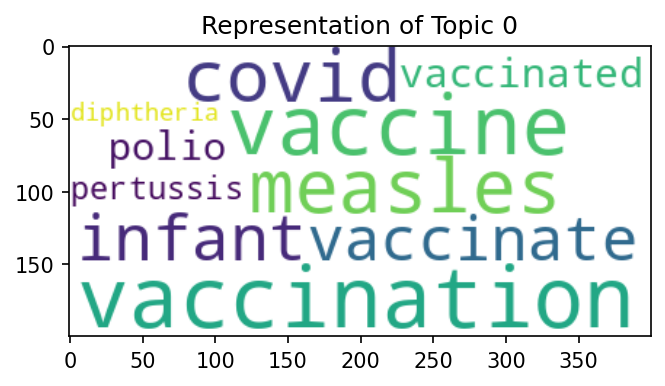

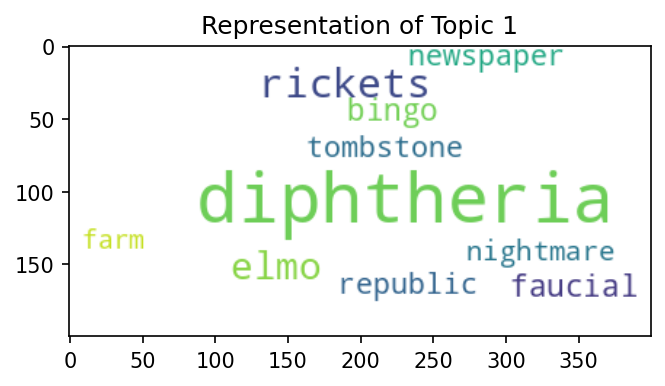

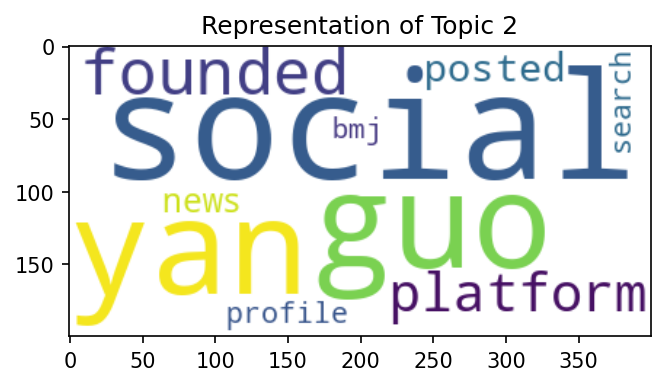

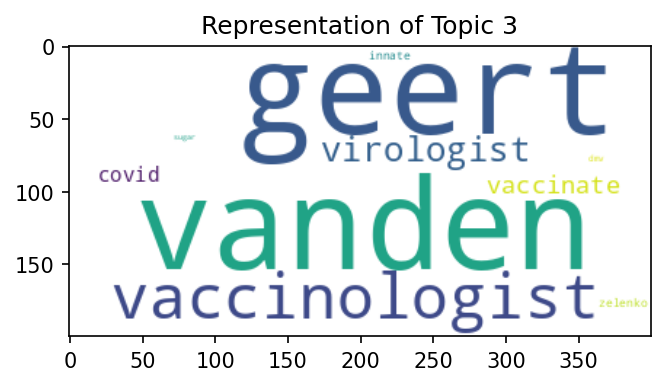

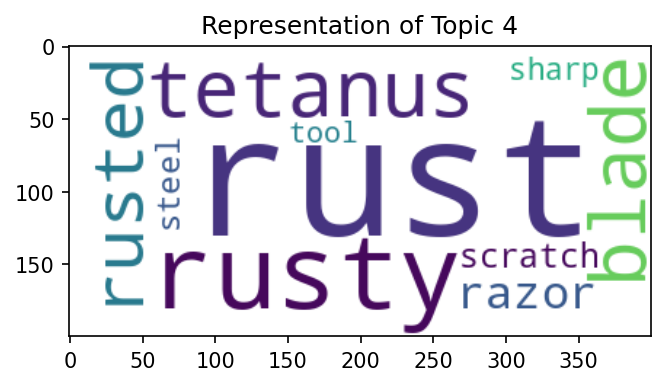

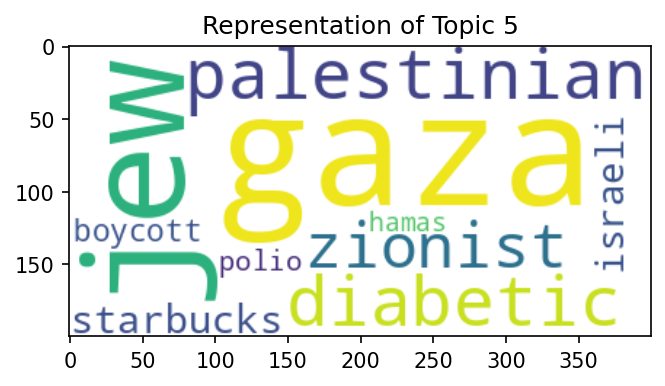

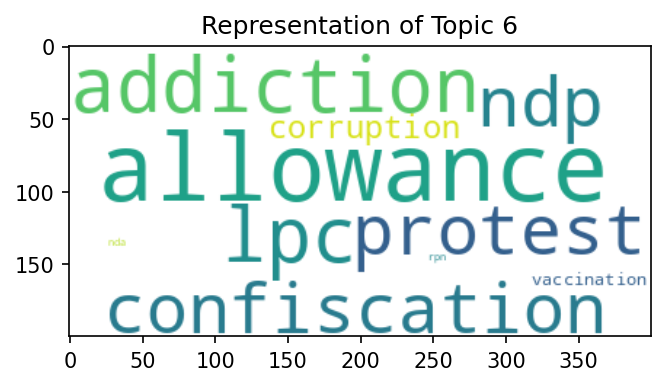

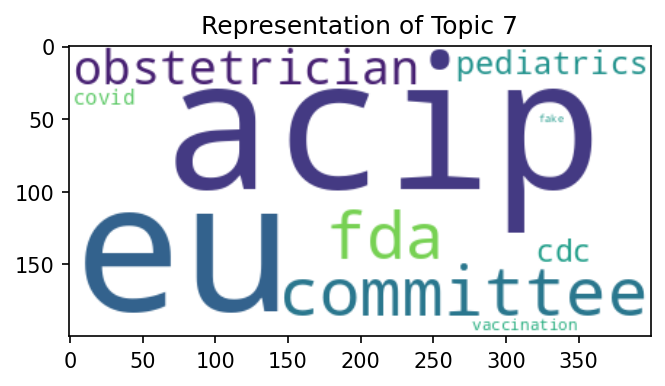

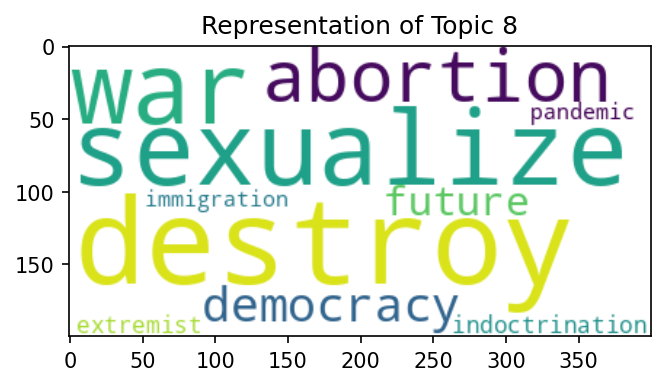

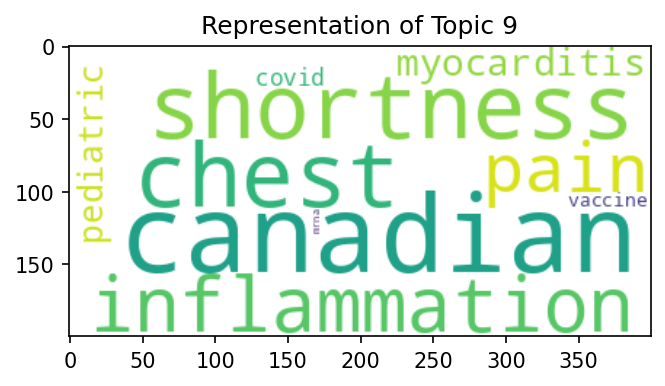

In [62]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [63]:
topic_model.visualize_heatmap(top_n_topics=10)

In [64]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 61/61 [00:25<00:00,  2.42it/s]


In [66]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

In [69]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15794 entries, 0 to 28010
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   author_id       15794 non-null  int64         
 1   tweet_id        15794 non-null  int64         
 2   text            15794 non-null  object        
 3   clean_text      15794 non-null  object        
 4   created_at      15794 non-null  datetime64[ns]
 5   date            15794 non-null  object        
 6   time            15794 non-null  object        
 7   day_of_week     15794 non-null  object        
 8   new_lemma_text  15794 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.7+ MB


In [72]:
timestamp=data_tweet.created_at.tolist()

In [73]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [01:42,  5.13s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"parent, outlaw, vaccination, disagreed, pregnancy",36,2023-11-04 03:39:57.145999872
1,0,"vaccination, infant, vaccine, covid, mortality",351,2023-11-04 03:39:57.145999872
2,1,"bollock, rickets, elmo, soviet, faucial",2,2023-11-04 03:39:57.145999872
3,2,"checking, false, link, guo, limeng",4,2023-11-04 03:39:57.145999872
4,5,"gaza, unrwa, israel, stand, zionist",5,2023-11-04 03:39:57.145999872
...,...,...,...,...
504,51,"bacteria, wound, costume, kishida, flushing",3,2024-03-04 20:15:14.300000000
505,52,"asc, influenza, cov, sars, sarscov2",14,2024-03-04 20:15:14.300000000
506,58,"britney, needle, tetanus, minaj, felonie",1,2024-03-04 20:15:14.300000000
507,59,"polio, paraphrasing, instrument, rachel, lump",4,2024-03-04 20:15:14.300000000


In [74]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [75]:

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
#topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)